# Introduction

Welcome to the final data mining module! This last module will cover predictive analysis. Specifically, we will be investigating the following topics:

- Logistic Regression
- Decision Trees
- Evaluation

## How to Run the Module

Throughout this module you will encounter both text and code cells. Please run each cell in this Notebook by clicking the "Run" button in the toolbar or by pushing Shift+Enter keys. 
<br>
![run_cell.png](Pictures/run_cell.png)

The cell above is an example of a code cell. You will be running numerous code cells like the one below throughout the case. Select the cell and select the run button above. 

In [ ]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')

## Introduction Video

Please use the cell below to setup the module and load your data. 

In [ ]:
cat('Data loading, please wait\n')
dataframe <- read.csv(file="Data/main_data.csv", encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

# Additional Setup
suppressMessages(library(caret))
dataframe$hospital_death <- as.factor(dataframe$hospital_death)
library(rpart)
library(rpart.plot)
library(pROC)

[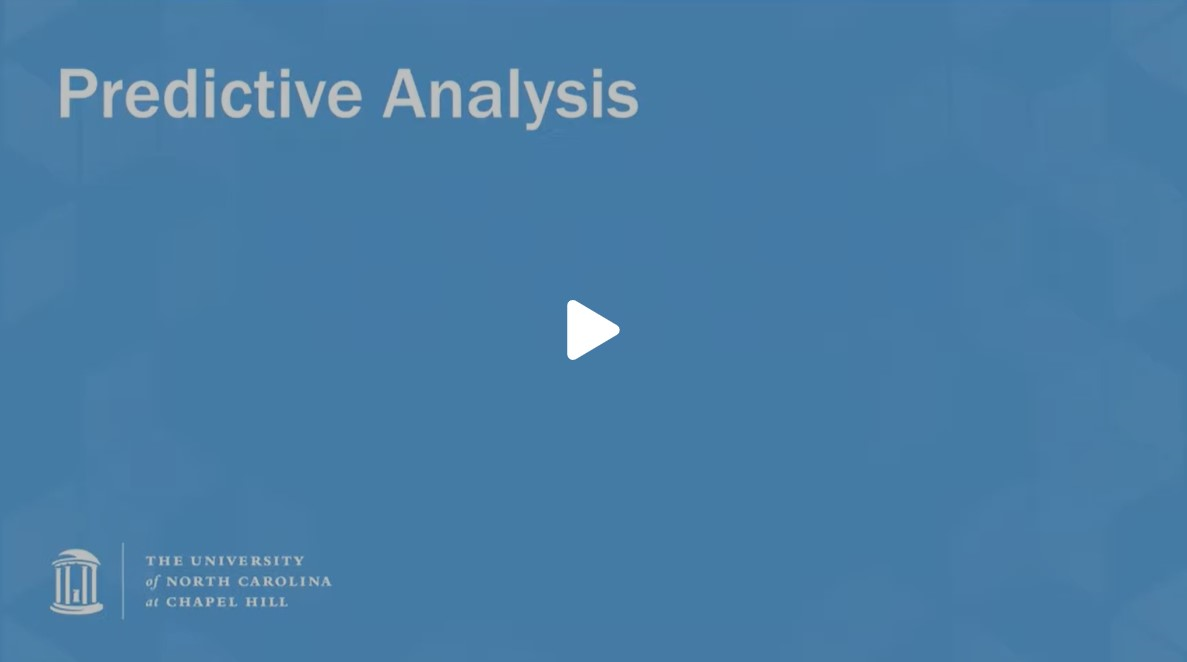](https://edpuzzle.com/media/5efc04016eae2f3f1cac3538 "Video 1")

# Training and Test Data

Before we begin we need to split our data into training and test data. Our training data will be called `trainingData` and our test data will be called `testData`. The code below will split our data and perform the necessary set up. 

In [ ]:
# Setting seed value to reproduce results of random sampling
set.seed(123)

# row positions for training data
index <- createDataPartition(dataframe$hospital_death, p = 0.80, list = FALSE)

# Creating training data
trainingData <- dataframe[index, ]  
cat('The number of traning data observations:', length(trainingData$hospital_death), '\n') # Checking the amount of training data

# Creating test data
testData  <- dataframe[-index, ]  
cat('The number of test data observations:', length(testData$hospital_death)) # Checking the amount of test data

# Logistic Regression

We will now be exploring logistic regression which is a common predictive algorithm used in data mining. When you build the model, you may get some warning messages. Feel free to ignore these.

<font color=blue, size=4>Watch the video and answer the quiz/exercises embedded in the video.<font>

[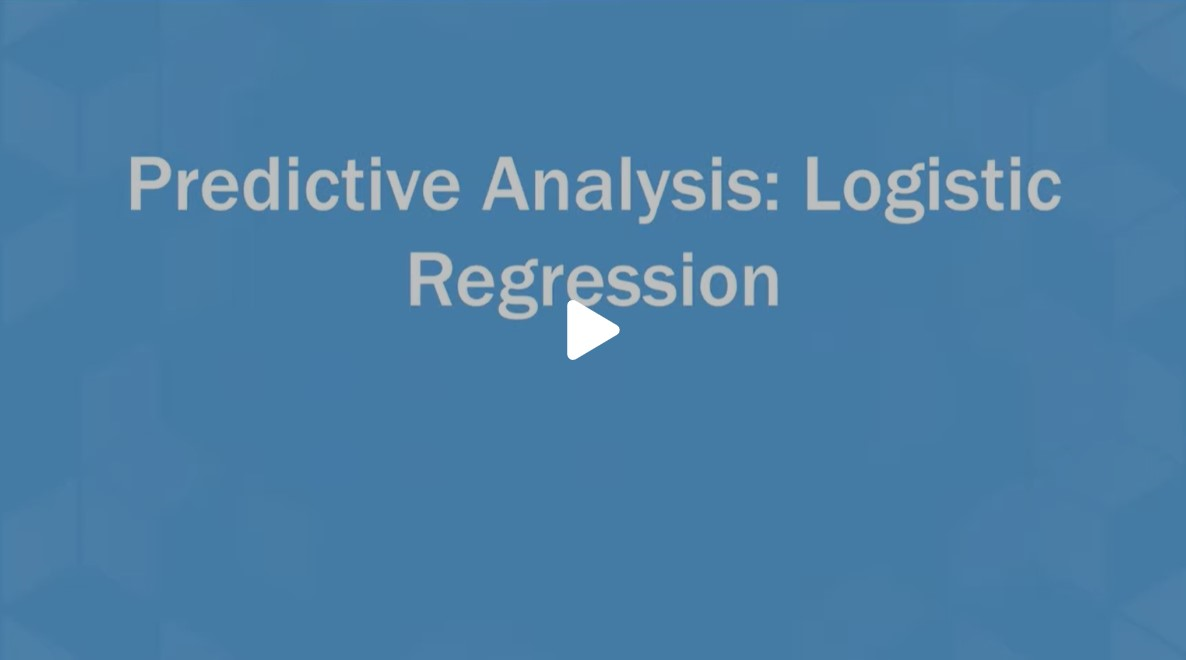](https://edpuzzle.com/media/5efc04390461183f31467fca "Video 2")

In [ ]:
# Build the model on training data
cat('Training model, please be patient...')
mylogit <- train(hospital_death ~ ., data = trainingData, method = 'glm', family = 'binomial', na.action=na.omit)
cat('Model trained!')

The code above created our model based on our training data. We will now apply it to our test data.

In [ ]:
modelPred <- predict(mylogit, newdata = testData, method = "glm", na.action = na.pass)
cat('Model successfully applied to test data!')

We can now see some initial results for our model. Do not worry if you do not understand all of the statistics yet. Evaluation metrics will be explained in more detail later in the module

# Decision Trees

We will now be exploring logistic regression which is a common predictive algorithm used in data mining. When you build the model, you may get some warning messages. Feel free to ignore these.

<font color=blue, size=4>Watch the video and answer the quiz/exercises embedded in the video.<font>

[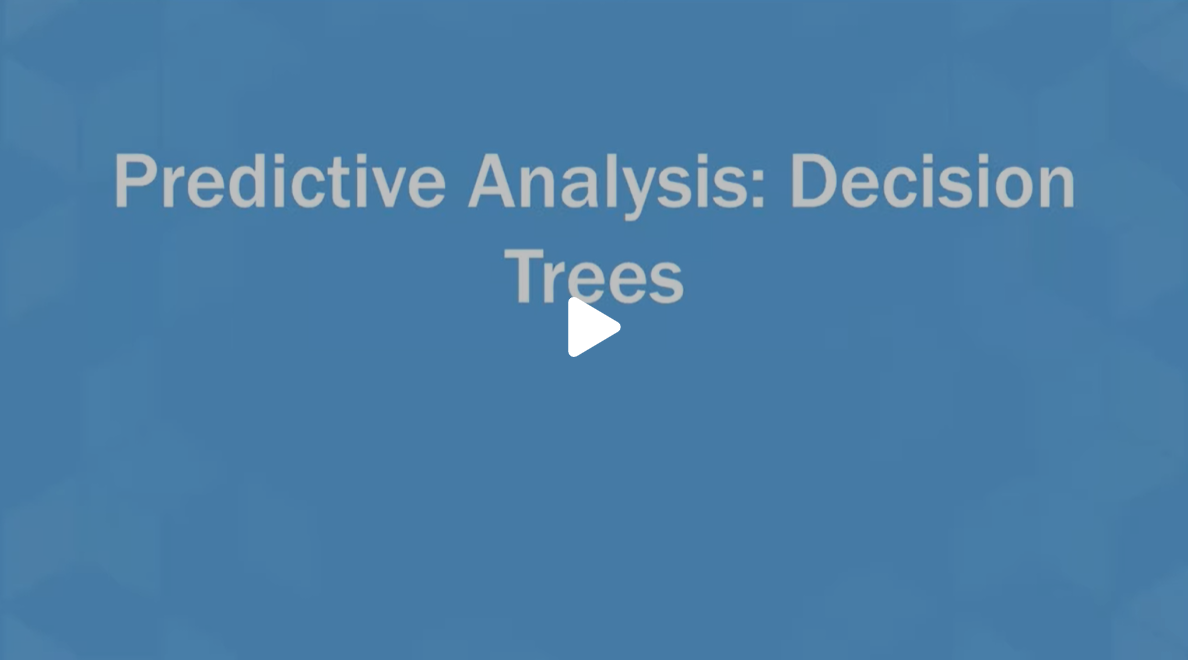](https://edpuzzle.com/media/5efc03df3218023f1506ce58 "Video 3")

Use the code below to train your decision tree

In [ ]:
# Train Decision Tree
print('Attempting')
train_decision_tree <- rpart(hospital_death ~ ., data = trainingData, method = 'class')
print('Success')

Now use the code below to visualize your decision tree

In [ ]:
# Plot Decision Tree
rpart.plot(train_decision_tree)

Finally, we can use the code below to see how our decision tree performed

In [ ]:
# Make prediction
test_decision_tree <- predict(train_decision_tree, testData, type = 'class')

# Evaluation

We will now be examining the performance of our two models. Evaluation is a critical part of predictive analysis!

<font color=blue, size=4>Watch the video and answer the quiz/exercises embedded in the video.<font>

[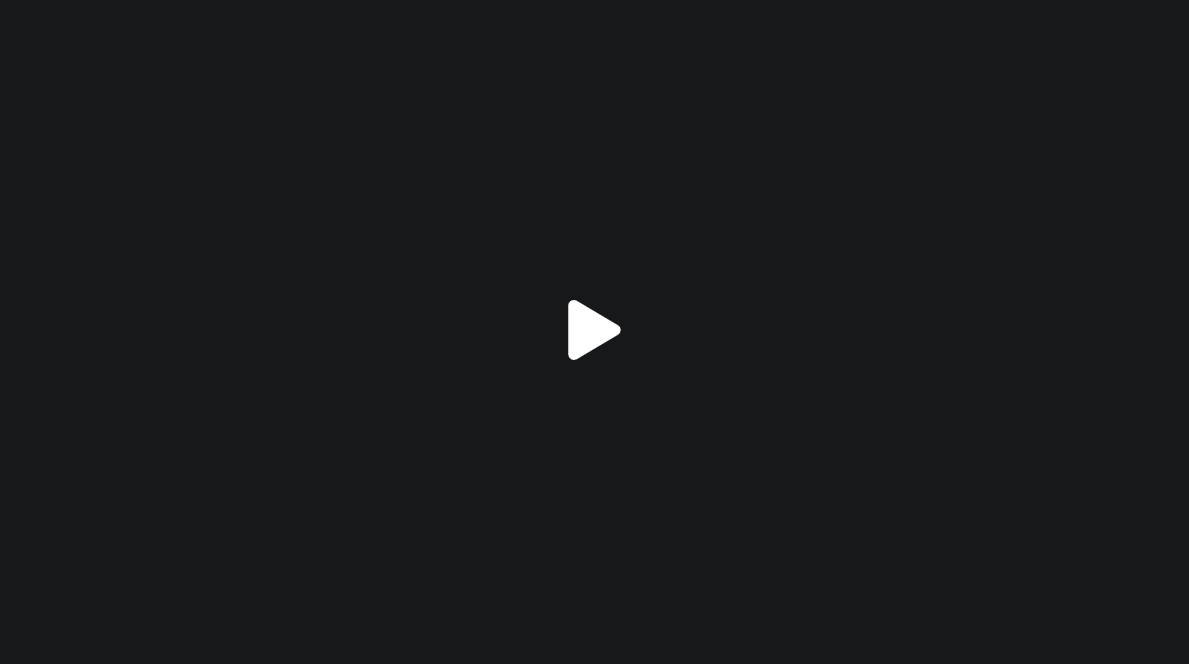](https://edpuzzle.com/media/5efc0436a3b47a3f2a725ae4 "Video 4")

Previous section of the module provided data on confusion matrices, accuracy, sensitivity, and specificity for different model. In this section we will be exploring ROC curves and AUC calculations

## Evaluation: Logistic Regression

Execute the code below to see results for your logistic regression model. Look specifically at the confusion matrix results, accuracy, specificity, and sensitivity.

In [ ]:
# Create Confusion matrix
confusionMatrix(modelPred, testData$hospital_death)

Execute the code below to see the ROC-AUC results for our logistic regression model.

In [ ]:
ROC <- roc(response = testData$hospital_death, predictor = factor(test_decision_tree, 
                                                           ordered = TRUE))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2),'\n')

## Evaluation: Decision Trees

Execute the code below to see results for your decision tree model. Look specifically at the confusion matrix results, accuracy, specificity, and sensitivity.

In [ ]:
# Display Confusion Matrix
confusionMatrix(test_decision_tree, testData$hospital_death)

Execute the code below to see the ROC-AUC results for our decision tree model.

In [ ]:
ROC <- roc(response = testData$hospital_death, predictor = factor(modelPred, 
                                                           ordered = TRUE))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2),'\n')

# Machine Learning Exercise

We will now bring everything you have learned together and apply it. For many predictive tasks, you will be attempting to select the optimal variables for a training model. Your goal in this module will be to select variable you think are important in predicting our outcome. You will then examine the effect of those selected variables on model performance

<font color=blue, size=4>Watch the video and answer the quiz/exercises embedded in the video.<font>

First we will need to do some setup. Go ahead and run the code below to setup the exercise

In [ ]:
# Create function to test models
test_model <- function(features){
    # Build the model on training data
    cat('Training model, please be patient...\n')
    total_variables <- append(features, 'TOTEXP09')
    play_trainingData <- subset(trainingData,select = total_variables)
    play_testData <- subset(testData,select = total_variables)
    suppressMessages(attach(trainingData))
    mylogit <- suppressWarnings(train(TOTEXP09~., data = play_trainingData, method = 'glm', family = 'binomial',na.action=na.omit))
    detach(trainingData)

    cat('Model trained!\n')
    # Apply the model to test data
    modelPred.na <- predict(mylogit, newdata = play_testData, method = "glm", na.action = na.pass)

    cat('Model successfully applied to test data!\n')

    # Create Confusion matrix
    cm <- confusionMatrix(modelPred.na, play_testData$TOTEXP09)
    ## Show confusion matrix
    print(cm)

    # Create a ROC curve
    ROC <- roc(response =play_testData$TOTEXP09, predictor = factor(modelPred.na, 
                                                               ordered = TRUE, 
                                                               levels = c('low_risk', 'high_risk')))
    # Plot ROC with ggplot2
    plot_ROC <- ggroc(ROC)
    print(plot_ROC)
    
    # Calculate the area under the curve (AUC)
    cat('AUC:', round(auc(ROC), 2),'\n')
    test <- varImp(mylogit)
    ggplot(test)
}


Now run the code below to see the list of variables/features in our dataset.

In [ ]:
colnames(trainingData)

From the list of features above, pick the features you believe are the most predictive for determining mortality. Feel free to use our earlier analysis to inform which features you pick (this will help you make a more informed choice). You can type in your features in between the parentheses below. Please follow the format shown in the example below.

<code>features = c('REGION09','SEX','RACETHNX')</code>

Be careful! If there are any typo, this will not work and you will need to run the code below again with the typo corrected. 

In [ ]:
features = c("ASACUT53","ADAPPT42","CHAPPT42")

Now we will see how our model performs using the features you selected. The below code will output evaluation metrics. 

In [ ]:
test_model(features)

Your task is to create a model which outperform our earlier models in the module. Good luck!